<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#package" data-toc-modified-id="package-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>package</a></span></li><li><span><a href="#function" data-toc-modified-id="function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>function</a></span></li><li><span><a href="#main" data-toc-modified-id="main-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>main</a></span><ul class="toc-item"><li><span><a href="#get-raw-data" data-toc-modified-id="get-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get raw data</a></span></li><li><span><a href="#test-coding_label-and-raw_text" data-toc-modified-id="test-coding_label-and-raw_text-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>test coding_label and raw_text</a></span></li><li><span><a href="#simple-analysis" data-toc-modified-id="simple-analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>simple analysis</a></span><ul class="toc-item"><li><span><a href="#clean-coder_id" data-toc-modified-id="clean-coder_id-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>clean coder_id</a></span></li><li><span><a href="#raw_text" data-toc-modified-id="raw_text-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>raw_text</a></span></li><li><span><a href="#coding_label" data-toc-modified-id="coding_label-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>coding_label</a></span></li><li><span><a href="#text_type-&amp;-assigned_label" data-toc-modified-id="text_type-&amp;-assigned_label-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>text_type &amp; assigned_label</a></span></li><li><span><a href="#label---test---majority-vote" data-toc-modified-id="label---test---majority-vote-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>label - test - majority vote</a></span></li></ul></li><li><span><a href="#count-via-loop" data-toc-modified-id="count-via-loop-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>count via loop</a></span></li><li><span><a href="#save-data" data-toc-modified-id="save-data-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>save data</a></span></li></ul></li><li><span><a href="#test" data-toc-modified-id="test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>test</a></span></li><li><span><a href="#end" data-toc-modified-id="end-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>end</a></span></li></ul></div>

In [1]:
## Pre-setting
# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2
# display the figure in the notebook
%matplotlib inline
# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

%load_ext memory_profiler

## package

In [2]:
import os
import sys
curr_folder = os.path.dirname(__file__) if '__file__' in dir() else os.path.abspath('')
src_dir = os.path.abspath(os.path.join(curr_folder, os.pardir, 'src'))
if src_dir not in sys.path: sys.path.insert(0, src_dir)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## System package
import numpy as np
from scipy import stats
from collections import Counter

import matplotlib.pyplot as plt

import pandas as pd
pd.options.display.max_columns = 500
# pd.options.display.max_rows = 500

## function

In [5]:
def clean_coder_id(x):
    try:
        return int(x)
    except:
        return 6

## main

### get raw data

In [6]:
raw_data_dir = os.path.abspath(os.path.join(os.pardir, 'data', 's2021_lumen_raw_data'))

In [7]:
raw_data_file_1 = 'FINAL_Lumen_Dataset_Coders_P1.csv'
raw_data_path_1 = os.path.join(raw_data_dir, raw_data_file_1)

In [8]:
raw_data_file_2 = 'FINAL_Lumen_Dataset_Coders_P2.csv'
raw_data_path_2 = os.path.join(raw_data_dir, raw_data_file_2)

In [9]:
raw_df_1 = pd.read_csv(raw_data_path_1)
raw_df_2 = pd.read_csv(raw_data_path_2)

In [10]:
raw_df_1

,Coder ID,Coding Label,Text,Assigned Label,Type
0,1,Authority or Expertise/Source Credibility,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
1,1,Reciprocation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
2,1,Commitment,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
3,1,Commitment- Indignation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",0,phishing email
4,1,Commitment- Call to Action,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
...,...,...,...,...,...
6175,Reliability,Objectivity,He's lucky to return home to reunite with his ...,0,russian ad
6176,Reliability,Gain framing,He's lucky to return home to reunite with his ...,0,russian ad
6177,Reliability,Loss framing,He's lucky to return home to reunite with his ...,0,russian ad
6178,Reliability,Blame/guilt,He's lucky to return home to reunite with his ...,0,russian ad


In [11]:
raw_df_2

,Coder ID,Coding Label,Text,Assigned Label,Type
0,1,Authority or Expertise/Source Credibility,It's time for THE PEOPLE to stand for Constitu...,0,russian ad
1,1,Reciprocation,It's time for THE PEOPLE to stand for Constitu...,0,russian ad
2,1,Commitment,It's time for THE PEOPLE to stand for Constitu...,1,russian ad
3,1,Commitment- Indignation,It's time for THE PEOPLE to stand for Constitu...,0,russian ad
4,1,Commitment- Call to Action,It's time for THE PEOPLE to stand for Constitu...,1,russian ad
...,...,...,...,...,...
39040,5,Objectivity,Former Vice President Joe Biden's presidential...,0,fake news
39041,5,Gain framing,Former Vice President Joe Biden's presidential...,0,fake news
39042,5,Loss framing,Former Vice President Joe Biden's presidential...,0,fake news
39043,5,Blame/guilt,Former Vice President Joe Biden's presidential...,1,fake news


In [12]:
raw_df_2.shape[0] / 15

2603.0

In [13]:
raw_df = pd.concat([raw_df_1, raw_df_2], ignore_index=1)

In [14]:
rename_dic = {
    'Coder ID': 'coder_id',
    'Coding Label': 'coding_label',
    'Text': 'raw_text',
    'Assigned Label': 'assigned_label',
    'Type': 'text_type',
}
raw_df.rename(columns=rename_dic, inplace=True)

In [15]:
raw_df

,coder_id,coding_label,raw_text,assigned_label,text_type
0,1,Authority or Expertise/Source Credibility,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
1,1,Reciprocation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
2,1,Commitment,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
3,1,Commitment- Indignation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",0,phishing email
4,1,Commitment- Call to Action,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
...,...,...,...,...,...
45220,5,Objectivity,Former Vice President Joe Biden's presidential...,0,fake news
45221,5,Gain framing,Former Vice President Joe Biden's presidential...,0,fake news
45222,5,Loss framing,Former Vice President Joe Biden's presidential...,0,fake news
45223,5,Blame/guilt,Former Vice President Joe Biden's presidential...,1,fake news


In [16]:
raw_df[:500]

,coder_id,coding_label,raw_text,assigned_label,text_type
0,1,Authority or Expertise/Source Credibility,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
1,1,Reciprocation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
2,1,Commitment,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
3,1,Commitment- Indignation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",0,phishing email
4,1,Commitment- Call to Action,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
...,...,...,...,...,...
495,1,Authority or Expertise/Source Credibility,Date: 26th-July-2012 DEAR LLOYDS TSB BANK HOLD...,1,phishing email
496,1,Reciprocation,Date: 26th-July-2012 DEAR LLOYDS TSB BANK HOLD...,0,phishing email
497,1,Commitment,Date: 26th-July-2012 DEAR LLOYDS TSB BANK HOLD...,1,phishing email
498,1,Commitment- Indignation,Date: 26th-July-2012 DEAR LLOYDS TSB BANK HOLD...,0,phishing email


### test coding_label and raw_text

In [17]:
raw_df.shape[0]/15

3015.0

In [18]:
unique_coding_labels = list(raw_df[:15].coding_label)
unique_coding_labels

['Authority or Expertise/Source Credibility',
 'Reciprocation',
 'Commitment',
 'Commitment- Indignation',
 'Commitment- Call to Action',
 'Liking',
 'Scarcity/Urgency/Opportunity',
 'Social Proof',
 'Social Proof- Admonition',
 'Subjectivity',
 'Objectivity',
 'Gain framing',
 'Loss framing',
 'Blame/guilt',
 'Emphasis']

In [19]:
unique_coding_labels = list(raw_df.coding_label.unique())
unique_coding_labels, len(unique_coding_labels)

(['Authority or Expertise/Source Credibility',
  'Reciprocation',
  'Commitment',
  'Commitment- Indignation',
  'Commitment- Call to Action',
  'Liking',
  'Scarcity/Urgency/Opportunity',
  'Social Proof',
  'Social Proof- Admonition',
  'Subjectivity',
  'Objectivity',
  'Gain framing',
  'Loss framing',
  'Blame/guilt',
  'Emphasis'],
 15)

### simple analysis

- clean up coder_id
- add lable_id
- add document_id
- add text_type_id


#### clean coder_id

In [20]:
raw_df.coder_id.value_counts()

4              10260
2              10095
5               8790
3               7845
3               2745
Reliability     2190
1               2055
5                735
1                510
Name: coder_id, dtype: int64

In [21]:
raw_df.coder_id.unique()

array(['1', '3', '5', 'Reliability', 1, 2, 3, 4, 5], dtype=object)

In [22]:
raw_df.coder_id = raw_df.coder_id.apply(clean_coder_id)

In [23]:
raw_df.coder_id.value_counts()

3    10590
4    10260
2    10095
5     9525
1     2565
6     2190
Name: coder_id, dtype: int64

#### raw_text

- How many unique texts?

In [24]:
uique_text_count = pd.DataFrame(raw_df.value_counts(['raw_text']), columns=['unique_count']).reset_index()
uique_text_count

,raw_text,unique_count
0,repost,225
1,Donald John Trump was elected the 45th preside...,60
2,America has always been hinged on hard-working...,60
3,"Anyways, nobody is listening to us.",45
4,This young woman who resembles an iconic activ...,45
...,...,...
2993,You have been invited to take a Satisfaction s...,1
2994,You have been invited to take a Satisfaction s...,1
2995,You have been invited to take a Satisfaction s...,1
2996,You have been invited to take a Satisfaction s...,1


In [25]:
2998 * 15

44970

In [26]:
unique_text_count_ary = uique_text_count.unique_count.to_numpy()

In [27]:
stats.mode(unique_text_count_ary)

ModeResult(mode=array([15], dtype=int64), count=array([2830]))

1

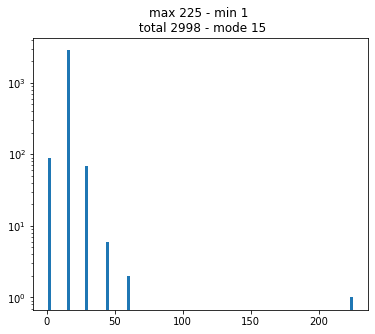

In [28]:


fig, ax = plt.subplots(figsize=(6, 5))

ax.hist(unique_text_count_ary, bins=100)

ax.set_title(
    'max %d - min %d \n total %d - mode %d'% (
        unique_text_count_ary.max(), 
        unique_text_count_ary.min(), 
        len(unique_text_count_ary),
        Counter(unique_text_count_ary).most_common()[0][0]
    )
)

ax.set_yscale("log")

1

In [29]:
raw_df.shape

(45225, 5)

In [30]:
pd.DataFrame(raw_df.value_counts(['coding_label', 'raw_text']), columns=['unique_count']).reset_index()

,coding_label,raw_text,unique_count
0,Social Proof,repost,15
1,Commitment- Indignation,repost,15
2,Liking,repost,15
3,Subjectivity,repost,15
4,Reciprocation,repost,15
...,...,...,...
43705,Emphasis,Amazon long-time executive Steve Kessel to ste...,1
43706,Emphasis,Amazon sinks on revenue miss ’’ ’Amazon Thursd...,1
43707,Emphasis,"Amazon to delivery companies: Yes, we’re build...",1
43708,Emphasis,America's Got Talent' winner is Kodi Lee: watc...,1


In [31]:
raw_df.value_counts(['coding_label', 'raw_text']).items()

#### coding_label

In [32]:
unique_coding_labels = raw_df.coding_label.unique()
unique_coding_labels, len(unique_coding_labels)

(array(['Authority or Expertise/Source Credibility', 'Reciprocation',
        'Commitment', 'Commitment- Indignation',
        'Commitment- Call to Action', 'Liking',
        'Scarcity/Urgency/Opportunity', 'Social Proof',
        'Social Proof- Admonition', 'Subjectivity', 'Objectivity',
        'Gain framing', 'Loss framing', 'Blame/guilt', 'Emphasis'],
       dtype=object),
 15)

In [33]:
pd.DataFrame(raw_df.value_counts(['coding_label']), columns=['unique_count']).reset_index()

,coding_label,unique_count
0,Authority or Expertise/Source Credibility,3015
1,Blame/guilt,3015
2,Commitment,3015
3,Commitment- Call to Action,3015
4,Commitment- Indignation,3015
5,Emphasis,3015
6,Gain framing,3015
7,Liking,3015
8,Loss framing,3015
9,Objectivity,3015


#### text_type & assigned_label

In [34]:
pd.DataFrame(raw_df.text_type.value_counts().items(), columns=['text_type', 'unique_count'])

,text_type,unique_count
0,news center,14670
1,news right,7365
2,russian ad,7335
3,news left,7320
4,phishing email,6150
5,fake news,2385


In [35]:
pd.DataFrame(raw_df.assigned_label.value_counts().items(), columns=['assigned_label', 'unique_count'])

,assigned_label,unique_count
0,0,30960
1,1,14265


#### label - test - majority vote

In [36]:
no_df = pd.DataFrame(raw_df[raw_df.assigned_label==0].value_counts(['coding_label', 'raw_text']), columns=['no_count']).reset_index()
no_df

,coding_label,raw_text,no_count
0,Gain framing,repost,15
1,Commitment- Indignation,repost,15
2,Social Proof- Admonition,repost,15
3,Social Proof,repost,15
4,Loss framing,repost,14
...,...,...,...
30055,Emphasis,UK to quadruple quota for migrant farm workers...,1
30056,Emphasis,UK ministers are expected to change House of L...,1
30057,Emphasis,UK government will accept opposition amendment...,1
30058,Emphasis,"UK corrects public finances data, reports slig...",1


In [37]:
yes_df =pd.DataFrame(raw_df[raw_df.assigned_label==1].value_counts(['coding_label', 'raw_text']), columns=['yes_count']).reset_index()
yes_df

,coding_label,raw_text,yes_count
0,Liking,repost,12
1,Subjectivity,repost,12
2,Reciprocation,repost,5
3,Commitment,America has always been hinged on hard-working...,4
4,Scarcity/Urgency/Opportunity,America has always been hinged on hard-working...,4
...,...,...,...
13816,Commitment- Call to Action,A Look at Attacks Where Vehicles Have Been Use...,1
13817,Commitment- Call to Action,A Senator Will Introduce Legislation Requiring...,1
13818,Commitment- Call to Action,A couple of weeks after U.S. Rep. Ayanna Press...,1
13819,Commitment- Call to Action,A fake death story about actor Will Smith and ...,1


In [38]:
2998 * 15

44970

In [39]:
label_01_df = yes_df.merge(no_df, how='outer', on=['coding_label', 'raw_text'])
label_01_df

,coding_label,raw_text,yes_count,no_count
0,Liking,repost,12.0,3.0
1,Subjectivity,repost,12.0,3.0
2,Reciprocation,repost,5.0,10.0
3,Commitment,America has always been hinged on hard-working...,4.0,NaN
4,Scarcity/Urgency/Opportunity,America has always been hinged on hard-working...,4.0,NaN
...,...,...,...,...
43705,Emphasis,UK to quadruple quota for migrant farm workers...,NaN,1.0
43706,Emphasis,UK ministers are expected to change House of L...,NaN,1.0
43707,Emphasis,UK government will accept opposition amendment...,NaN,1.0
43708,Emphasis,"UK corrects public finances data, reports slig...",NaN,1.0


### count via loop

In [40]:
raw_df

,coder_id,coding_label,raw_text,assigned_label,text_type
0,1,Authority or Expertise/Source Credibility,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
1,1,Reciprocation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
2,1,Commitment,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
3,1,Commitment- Indignation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",0,phishing email
4,1,Commitment- Call to Action,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email
...,...,...,...,...,...
45220,5,Objectivity,Former Vice President Joe Biden's presidential...,0,fake news
45221,5,Gain framing,Former Vice President Joe Biden's presidential...,0,fake news
45222,5,Loss framing,Former Vice President Joe Biden's presidential...,0,fake news
45223,5,Blame/guilt,Former Vice President Joe Biden's presidential...,1,fake news


In [41]:
len(raw_df.raw_text.unique())

2998

In [42]:
raw_df = raw_df.assign(
    text_type_id=(raw_df['text_type']).astype('category').cat.codes,
    coding_label_id=(raw_df['coding_label']).astype('category').cat.codes,
    raw_text_id=(raw_df['raw_text']).astype('category').cat.codes,
)

In [43]:
raw_df

,coder_id,coding_label,raw_text,assigned_label,text_type,text_type_id,coding_label_id,raw_text_id
0,1,Authority or Expertise/Source Credibility,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email,4,0,711
1,1,Reciprocation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email,4,10,711
2,1,Commitment,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email,4,2,711
3,1,Commitment- Indignation,"Date: 17th-May-2012 Valued NatWest Customer, Y...",0,phishing email,4,4,711
4,1,Commitment- Call to Action,"Date: 17th-May-2012 Valued NatWest Customer, Y...",1,phishing email,4,3,711
...,...,...,...,...,...,...,...,...
45220,5,Objectivity,Former Vice President Joe Biden's presidential...,0,fake news,0,9,1172
45221,5,Gain framing,Former Vice President Joe Biden's presidential...,0,fake news,0,6,1172
45222,5,Loss framing,Former Vice President Joe Biden's presidential...,0,fake news,0,8,1172
45223,5,Blame/guilt,Former Vice President Joe Biden's presidential...,1,fake news,0,1,1172


In [44]:
len(raw_df.raw_text_id.unique())

2998

In [45]:
for i in unique_coding_labels:
    i
i

'Emphasis'

In [46]:
raw_dict = {}

for i in raw_df.raw_text_id.unique():
    raw_dict[i] = {}
    
    raw_dict[i]['raw_text'] = ''
    raw_dict[i]['raw_text_id'] = i
    raw_dict[i]['text_type'] = []
    
    
    for j in unique_coding_labels:
        raw_dict[i]['%s_y'%j] = 0
        raw_dict[i]['%s_n'%j] = 0
        raw_dict[i]['%s_t'%j] = 0
        raw_dict[i][j] = 0
        
        
    
    
    

In [47]:
%%time

for i in raw_df.itertuples():
    
    raw_text_id = i.raw_text_id
    raw_text = i.raw_text
    text_type = i.text_type
    
    coding_label = i.coding_label
    assigned_label = i.assigned_label
    
    
    raw_dict[raw_text_id]['raw_text'] = i.raw_text
    raw_dict[raw_text_id]['raw_text_id'] = raw_text_id
    
    if text_type not in raw_dict[raw_text_id]['text_type']:
        raw_dict[raw_text_id]['text_type'].append(text_type)
        
    
    
    raw_dict[raw_text_id]['%s_t'%coding_label] += 1
    
    if assigned_label:
        raw_dict[raw_text_id]['%s_y'%coding_label] += 1
    else:
        raw_dict[raw_text_id]['%s_n'%coding_label] += 1
        
    

Wall time: 519 ms


- check if all text has only one text_type

In [48]:
for i in raw_df.raw_text_id.unique():
    if len(raw_dict[i]['text_type']) != 1:
        print('Doc %d has more than one text_type' % i)
        
    else:
        raw_dict[i]['text_type'] = raw_dict[i]['text_type'][0]
        

- Use majority vote to determine 

In [49]:
doc_label_equals = []
doc_label_nos = []

for i in raw_df.raw_text_id.unique():
    
    for j in unique_coding_labels:
        if raw_dict[i]['%s_y'%j] == raw_dict[i]['%s_n'%j]:
            
            if raw_dict[i]['%s_y'%j] == 0:
                print('For doc-%d, %s is not considered' % (i, j))
                doc_label_nos.append((i,j))
            else:
                print('*** For doc-%d, %s is un-determined: %d ***' % (i, j, raw_dict[i]['%s_y'%j]))
                doc_label_equals.append((i,j))
                
        if raw_dict[i]['%s_y'%j] > raw_dict[i]['%s_n'%j]:
            raw_dict[i][j] = 1

*** For doc-1375, Liking is un-determined: 1 ***
*** For doc-1283, Social Proof is un-determined: 1 ***
*** For doc-1283, Subjectivity is un-determined: 1 ***
*** For doc-1283, Blame/guilt is un-determined: 1 ***
*** For doc-1283, Emphasis is un-determined: 1 ***
*** For doc-2812, Authority or Expertise/Source Credibility is un-determined: 1 ***
*** For doc-2812, Liking is un-determined: 1 ***
*** For doc-2812, Gain framing is un-determined: 1 ***
*** For doc-2538, Scarcity/Urgency/Opportunity is un-determined: 1 ***
*** For doc-2538, Social Proof is un-determined: 1 ***
*** For doc-2538, Subjectivity is un-determined: 1 ***
*** For doc-1108, Scarcity/Urgency/Opportunity is un-determined: 1 ***
*** For doc-126, Authority or Expertise/Source Credibility is un-determined: 1 ***
*** For doc-126, Commitment is un-determined: 1 ***
*** For doc-126, Subjectivity is un-determined: 1 ***
*** For doc-126, Objectivity is un-determined: 1 ***
*** For doc-126, Blame/guilt is un-determined: 1 ***
*

For doc-507, Blame/guilt is not considered
For doc-507, Emphasis is not considered
For doc-508, Authority or Expertise/Source Credibility is not considered
For doc-508, Reciprocation is not considered
For doc-508, Commitment is not considered
For doc-508, Commitment- Indignation is not considered
For doc-508, Commitment- Call to Action is not considered
For doc-508, Liking is not considered
For doc-508, Scarcity/Urgency/Opportunity is not considered
For doc-508, Social Proof is not considered
For doc-508, Social Proof- Admonition is not considered
For doc-508, Subjectivity is not considered
For doc-508, Objectivity is not considered
For doc-508, Loss framing is not considered
For doc-508, Blame/guilt is not considered
For doc-508, Emphasis is not considered
For doc-509, Authority or Expertise/Source Credibility is not considered
For doc-509, Reciprocation is not considered
For doc-509, Commitment is not considered
For doc-509, Commitment- Indignation is not considered
For doc-509, Comm

In [50]:
i, j = doc_label_nos[0]
raw_df.loc[(raw_df.raw_text_id==i)&(raw_df.coding_label==j) , :]

,coder_id,coding_label,raw_text,assigned_label,text_type,text_type_id,coding_label_id,raw_text_id


In [51]:
i, j = doc_label_equals[1]
raw_df.loc[(raw_df.raw_text_id==i)&(raw_df.coding_label==j) , :]

,coder_id,coding_label,raw_text,assigned_label,text_type,text_type_id,coding_label_id,raw_text_id
4117,6,Social Proof,He's lucky to return home to reunite with his ...,1,russian ad,5,12,1283
6172,6,Social Proof,He's lucky to return home to reunite with his ...,0,russian ad,5,12,1283


In [52]:
useful_colums = [
    'raw_text_id',
    'raw_text',
    'text_type',
]

useful_colums += list(sorted(unique_coding_labels))


useful_colums

['raw_text_id',
 'raw_text',
 'text_type',
 'Authority or Expertise/Source Credibility',
 'Blame/guilt',
 'Commitment',
 'Commitment- Call to Action',
 'Commitment- Indignation',
 'Emphasis',
 'Gain framing',
 'Liking',
 'Loss framing',
 'Objectivity',
 'Reciprocation',
 'Scarcity/Urgency/Opportunity',
 'Social Proof',
 'Social Proof- Admonition',
 'Subjectivity']

In [53]:
re_df = pd.DataFrame(raw_dict.values())[useful_colums]
re_df

,raw_text_id,raw_text,text_type,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
0,711,"Date: 17th-May-2012 Valued NatWest Customer, Y...",phishing email,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1
1,2947,"Your account has 1 New Alert, received on 20/0...",phishing email,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1
2,736,"Date: 19th-May-2018 Dear Customer, This messag...",phishing email,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1
3,796,Date: 22nd-November-2015 PAYPAI - LOGIN PAYPAL...,phishing email,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1
4,2064,Quota Limit Inbox x Lehigh Uni to drh & LEHIGH...,phishing email,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2478,The website Breaking News offered Christmas Da...,fake news,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1
2994,1173,Former Vice President Joe Biden's presidential...,fake news,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
2995,2002,Philippine President Rodrigo Duterte warned th...,fake news,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1
2996,270,As some Virginia Democrats try to fend off acc...,fake news,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1


- number of docs without any lable

In [54]:
sum(re_df[unique_coding_labels].to_numpy().sum(axis=1) == 0)

58

In [55]:
re_df[unique_coding_labels].to_numpy().sum(axis=1)

array([11,  8, 10, ...,  6,  4,  6], dtype=int64)

In [56]:
doc_ids_wt_label = re_df.raw_text_id.to_numpy()[(re_df[unique_coding_labels].to_numpy().sum(axis=1) == 0)]
doc_ids_wt_label

array([ 820, 2945,  264, 2973, 1651,  500,  502,  505,  509,  510, 2918,
       2921, 2923, 2925, 2926, 2930, 2931,  747,  749,  751,  753,  754,
        758,  956,  958,  960,  962,  963,  964,  966,  969, 2066, 2067,
       2069, 2070, 2071, 2072, 2074, 2077, 2078, 2079,  238,  239,  240,
        241,  242,  243,  229,  230,  231,  233,  234,  235,  236,   34,
       1938,  101, 2516], dtype=int64)

In [57]:
re_df.sort_values('raw_text_id', inplace=True)
re_df

,raw_text_id,raw_text,text_type,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
2659,0,"""A Baker Swept By,"" by Edward Hirsch Audio: Re...",news left,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2064,1,"""Get Out"" Won’t Have A 100% Rating On Rotten T...",news left,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
689,2,"""I wish you are still alive to see what Americ...",russian ad,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
348,3,"""Know Your Rights or Your Safety Is At Risk In...",russian ad,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1
468,4,"""Nancy Pelosi was drunk again today,"" begins a...",fake news,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,2993,’The View’ Co-host Joy Behar: Trump Is ’The Mo...,news right,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1
779,2994,’Will Hillary Clinton Get Prosecuted’: Most-Go...,news right,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2747,2995,’You Are Amazing!’ Donald Trump Wrote To Harry...,news left,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1462,2996,“Purple Rain” Is Returning To Theaters In Trib...,news left,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0


In [58]:
raw_df[raw_df.raw_text_id==doc_ids_wt_label[1]]

,coder_id,coding_label,raw_text,assigned_label,text_type,text_type_id,coding_label_id,raw_text_id
1665,3,Authority or Expertise/Source Credibility,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,0,2945
1666,3,Reciprocation,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,10,2945
1667,3,Commitment,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,2,2945
1668,3,Commitment- Indignation,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,4,2945
1669,3,Commitment- Call to Action,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,3,2945
1670,3,Liking,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,7,2945
1671,3,Scarcity/Urgency/Opportunity,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,11,2945
1672,3,Social Proof,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,12,2945
1673,3,Social Proof- Admonition,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,13,2945
1674,3,Subjectivity,Your Online CitiBank Password was reset on 11/...,0,phishing email,4,14,2945


### save data

In [59]:
clean_data_folder = os.path.abspath(os.path.join(os.pardir, 'data', 's2021_lumen_clean_data'))
clean_data_file = 's2021_05_23_01_lumen_clean_data.csv'

clean_data_path = os.path.join(clean_data_folder, clean_data_file)

In [60]:
re_df.to_csv(clean_data_path, index=False)

## test

In [61]:
1

1

## end

In [62]:
1

1